# Assignment 5:  Due 10/6

In this assignment you will become familiar with the Pandas library through the exploration of a Nobel prize data set. 

This data set was taken from the Kaggle website (https://www.kaggle.com/). If you are interested in data science and / or analysis, this website offers tons of data sets in various formats that you can access. They even post compititions that you can enter, some with money prizes awarded.

The libraries needed for this assignment are listed below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# 1a)

Read in the data set 'data/nobel.csv' into a DataFrame using Pandas .

In [4]:
df = pd.read_csv('nobel.csv')

# 1b)

Display below the output from the DataFrame functions *info*.

In [79]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 128.2+ KB


# 1c)

Show the first 5 listings of the dataset.

In [6]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# Problem 2

How many null ('NaN') values there are in each *catagory*? What is the total number of Null values in the DataFrame?

In [93]:
nancount=([])
for i in range(18):
    nancount.insert(i,df.loc[i].isnull().sum())
    print(df.loc[i:],"has",df.loc[i].isnull().sum())

print("total NaN count:",sum(np.asarray(nancount)))

total NaN count: 31


# Problem 3

Make a histogram of the number of nobel prizes awarded per year. Around which decade (1900, 1910, 1920, ...) were the least amount of prizes awarded?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B91A849888>]],
      dtype=object)

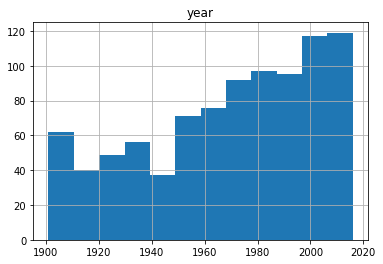

In [25]:

df.shape
df.prize
df.year

df.hist('year',bins=12)
#the historgram below shows that the 1940s gave out the least amount of nobel prizes

# Problem 4

Use groupby method to printout the number of prizes awarded to each category. Which categroy has the most prizes?

In [139]:
df.drop('laureate_id')
df.groupby('category').describe().transpose().drop('year')

KeyError: "['laureate_id'] not found in axis"

In [ ]:
#it looks ugly but the second row shows prizes awarded to each catergory.
#as seen above, Medicine has the most.

# Problem 5

Find percentage of the prizes were awarded to 1, 2, 3, and 4 people? Meaning what percentage of 1/1, 1/2, 1/3, and 1/4 prize_shares are there?

In [61]:
### somethig this like "df.count('prizeshare(x)')"
ps=df.groupby('prize_share').describe().transpose().drop('year')
print(ps)

sharedf=pd.DataFrame({"1/1":[344*100/911],"1/2":[306*100/911],"1/3":[201*100/911],"1/4":[60*100/911]})#need count over total
print(sharedf)

prize_share               1/1         1/2         1/3         1/4
laureate_id count  344.000000  306.000000  201.000000   60.000000
            mean   450.886628  441.552288  510.597015  475.033333
            std    253.367803  269.792948  276.621984  326.166796
            min      1.000000    2.000000   65.000000    5.000000
            25%    221.750000  213.250000  326.000000  136.750000
            50%    515.000000  441.500000  421.000000  388.000000
            75%    643.250000  688.500000  779.000000  824.250000
            max    937.000000  936.000000  933.000000  930.000000
         1/1        1/2        1/3       1/4
0  37.760703  33.589462  22.063666  6.586169


# Problem 6

Determine how many males and females won the prize. Does the sum of male and female prizes add up to the total entries? If not, why?

On the same graph make histograms for the numbber of males and females that won the prize each year. 

In [153]:
sex=df.groupby('sex').describe().transpose().drop('year')
print()
df.hist('sex',index = 1,bins=2)

ValueError: hist method requires numerical columns, nothing to plot.

# Problem 7

How many prizes were won by those whose birth country was United States of America?

In [149]:
region=df.groupby('birth_country').describe().drop("year",axis=1).transpose()
print(region.Germany)
#it keeps returning that United_States_of_America does not exist in the datafrome
#also the laureate_id is showing up as an index that i can't get rid of without erasing all the data

laureate_id  count     61.000000
             mean     328.622951
             std      230.238873
             min       19.000000
             25%      184.000000
             50%      270.000000
             75%      453.000000
             max      886.000000
Name: Germany, dtype: float64


# Problem 8

Determine the age that each of the prize winners was when they won the prize. Find the youngest and oldest to win the prize. Find the mean age to win the prize, and the standard deviation of it. Make a histogram of the age each person was when they won the prize.

### Hint: You can use Pandas DatetimeIndex method to extract the year from the date format yyyy-mm-dd
> pd.DatetimeIndex(date).year

Where *date* is given in a formate like year-month-day, the above will returen the year, hence the *.year* in the call above. Use 'shit+tab' on pandas.DatetimeIndex to learn more.

In [108]:

Age=df.birth_day

bytype.sum()
bytype.std()


KeyError: 'birth_day'

# Problem 9

Make a copy of the current DataFrame. Then drop the column *lauret_id* from the copied DataFrame (do this inplace so this column is gone).

# Problem 10

Add the age column you calculated in Problem 8 to the DataFrame.